In [85]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import matplotlib as mpl

# 定义文件夹路径
folder1 = "../../../学术/项目/Chimera/Experiment/Classify/benchmark_results_marlong_complete_ganon_balance"
folder2 = "../../../学术/项目/Chimera/Experiment/Classify/benchmark_results_marlong_complete_0.7threshold"

plt.rcParams.update({
    'font.family': 'Arial',  # 设置全局字体
    'axes.unicode_minus': False  # 解决负号显示问题
})
# 统一字体大小变量，方便修改
title_fontsize = 20
label_fontsize = 24
tick_fontsize = 24
legend_fontsize = 16
annot_fontsize = 24  # 数值标注字体大小

# 颜色方案（论文配色 + 适当透明度）
colors = ["#74AED4", "#F7C97E", "#ECA8A9", "#C6CF9D"]
# sns.set(style="white")
sns.set_palette("deep") 
sns.set_style("whitegrid", {'axes.grid': False, 'ytick.left': True})

In [86]:
def extract_metrics(files):
    """
    从多个 CSV 文件中提取 'Species' Rank 的准确率、精确率、召回率、F1 分数平均值
    """
    acc_list, prec_list, rec_list, f1_list = [], [], [], []
    
    for file in files:
        df = pd.read_csv(file)
        # 只保留 Taxonomic Rank == 'Species' 的行
        df_species = df[df["Taxonomic Rank"] == "Species"]
        # 如果文件里没有 species 行，可以先跳过或做别的处理
        if df_species.empty:
            continue
        
        # 如果一个 CSV 中针对 species 有多行 (例如多个样本)，可以对这些行再做平均
        acc_list.append(df_species["Accuracy"].mean())
        prec_list.append(df_species["Precision"].mean())
        rec_list.append(df_species["Recall"].mean())
        f1_list.append(df_species["F1 Score"].mean())
    
    # 取所有文件的平均
    metrics = {
        "Accuracy": np.mean(acc_list) if len(acc_list) > 0 else np.nan,
        "Precision": np.mean(prec_list) if len(prec_list) > 0 else np.nan,
        "Recall": np.mean(rec_list) if len(rec_list) > 0 else np.nan,
        "F1 Score": np.mean(f1_list) if len(f1_list) > 0 else np.nan
    }
    
    return metrics


# 提取两个文件夹的数据
files_folder1 = glob.glob(f"{folder1}/ganon_*_classification.csv")
files_folder2 = glob.glob(f"{folder2}/ganon_*_classification.csv")

metrics_folder1 = extract_metrics(files_folder1)  # ganonBalance
metrics_folder2 = extract_metrics(files_folder2)  # ganon

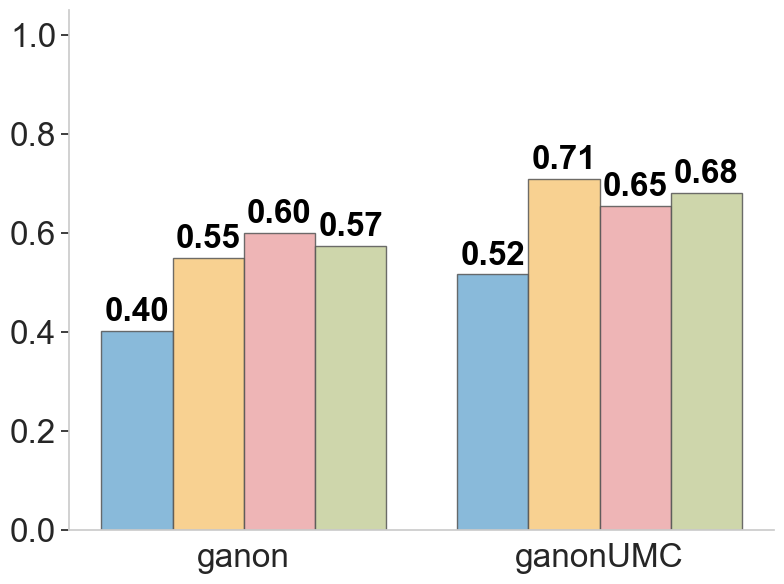

In [87]:
# 绘制科学论文风格的柱状图
def plot_paper_style_bar_chart(metrics1, metrics2):
    metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
    models = ["ganon", "ganonUMC"]  # X 轴顺序，ganon 在左，ganonBalance 在右
    bar_width = 0.2  # 调整柱子的宽度
    x = np.arange(len(models))  # x 轴的索引
    
    plt.figure(figsize=(8, 6))

    # 画出四个指标的柱状图
    for i, metric in enumerate(metrics):
        bars = plt.bar(
            x + (i - 1.5) * bar_width, 
            [metrics2[metric], metrics1[metric]],  
            width=bar_width, 
            label=metric, 
            color=colors[i],  
            alpha=0.85,  # 设置轻微透明度，让颜色更柔和
            edgecolor="#555555"  # 柔和边框颜色
        )

        # 在柱子顶部添加数值，保留两位小数
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width() / 2, height + 0.02, 
                f"{height:.2f}", ha='center', fontsize=annot_fontsize, fontweight="bold", color="black", family="Arial"
            )

    # 设置 x 轴标签
    plt.xticks(x, models, fontsize=tick_fontsize)
    plt.yticks(fontsize=tick_fontsize)

    # 去掉标题
    # plt.title("Comparison of UMC Strategy in Ganon Classifier", fontsize=title_fontsize)

    # 设置 y 轴范围 0 - 1.05
    plt.ylim(0, 1.05)

    # 移除背景网格，但保留 y 轴点状参考线
    plt.grid(False)

    # 去掉不必要的边框
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    
    # 调整布局
    plt.tight_layout()
    
    # 导出为 SVG 文件
    plt.savefig("ganonComparisonUMC.svg", format="svg", dpi=300)  # 保存为SVG格式
    
    # 显示图形
    plt.show()

# 画出最终论文风格的图并导出为SVG
plot_paper_style_bar_chart(metrics_folder1, metrics_folder2)